In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import calendar
import scipy.stats as stats

In [2]:
csv_path1= "clean_crime_data.csv"
crime_df = pd.read_csv(csv_path1)
del crime_df['Unnamed: 0']
crime_df.tail()

,Age,Gender,Race,Offenses Severity,Arrest Time of Day,Arrest Hour,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature Range,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
17761,33.0,F,W,Misdemeanor,Late Morning (9am-12pm),9,Monday,31,December,2018,40s,42.64,Light Rain,"7600 Block Bennett ST Pittsburgh, PA 15221",40.454846,-79.890321,Homewood South,5
17762,69.0,M,W,Misdemeanor,Early Evening (5-8pm),20,Monday,31,December,2018,40s,42.64,Light Rain,"50 Block 11th ST Pittsburgh, PA 15222",40.428967,-79.987676,Central Business District,2
17763,49.0,M,W,Misdemeanor,Early Evening (5-8pm),20,Monday,31,December,2018,40s,42.64,Light Rain,"900 Block Liberty AV Pittsburgh, PA 15222",40.442945,-79.997939,Central Business District,2
17764,35.0,F,W,Felony,Early Evening (5-8pm),17,Monday,31,December,2018,40s,42.64,Light Rain,"50 Block 11th ST Pittsburgh, PA 15219",40.428967,-79.987676,Central Business District,2
17765,28.0,M,W,Misdemeanor,Early Evening (5-8pm),19,Monday,31,December,2018,40s,42.64,Light Rain,"1400 Block E Carson ST Pittsburgh, PA 15203",40.428657,-79.984034,South Side Flats,3


In [3]:
csv_path2= "all_date_temp_data.csv"
weather_df = pd.read_csv(csv_path2)
del weather_df['Unnamed: 0']
weather_df.tail()

,Date,Year,Temperature,Weather Condition
1048,2018-12-26,2018,44.11,Clear
1049,2018-12-27,2018,48.06,Clear
1050,2018-12-28,2018,60.86,Overcast
1051,2018-12-29,2018,35.21,Overcast
1052,2018-12-30,2018,39.11,Overcast


<function matplotlib.pyplot.show(*args, **kw)>

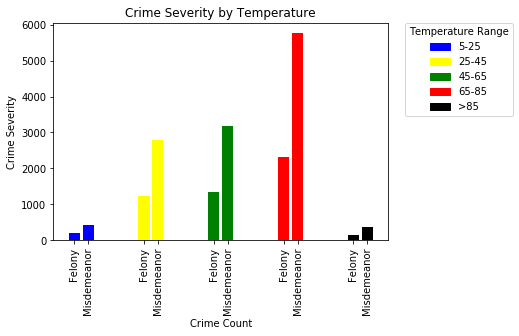

In [4]:
#Temperature group, crime severity bar chart
stevie_plot_df = crime_df[['Offenses Severity', 'Temperature', 'Weather Condition']].copy()


bins = [5,25,45,65,85,1000]
bin_names = ['5-25','25-45','45-65','65-85','>85']

stevie_plot_df['Temperature Group'] = pd.cut(stevie_plot_df["Temperature"],
                                             bins,
                                             labels=bin_names)

stevie_gp1 = stevie_plot_df.groupby(['Temperature Group','Offenses Severity'])
stevie_1_df = stevie_gp1.count()


x_pos = []
for x in range(len(bins) - 1):
    x_pos.append(x*5)
    x_pos.append(x*5+1)
    
    
tick_labels = ['Felony', "Misdemeanor"]
tick_labels = tick_labels *5 
tick_locations = [x for x in x_pos]

color = ['blue', 'yellow', 'green', 'red' , 'black']
colors = []
for x in color:
    colors.append(x)
    colors.append(x)
    

plt.bar(x_pos,
        stevie_1_df['Temperature'],
        color = colors
       )

plt.xticks(tick_locations,
           tick_labels,
           rotation = 'vertical'
          )

plt.title('Crime Severity by Temperature')

plt.xlabel('Crime Count')
plt.ylabel('Crime Severity')

patches = []
for x, y in zip(color, bin_names):
    patches.append(mpatches.Patch(color= x, label= y))
    
plt.legend(title = 'Temperature Range',
           handles=patches,
           bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)
plt.savefig("Plots/crime_severity_temperature.png")

plt.show

### Luiz Peter

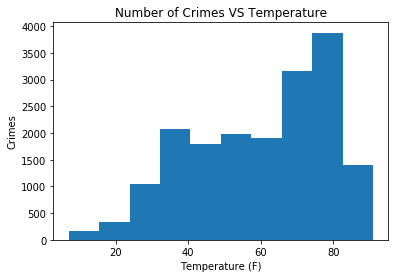

<Figure size 432x288 with 0 Axes>

In [9]:
#This should be a Histogram (bar graph) due to the fact that we counted the crimes accross the dataset 
crime_df["Rounded Temp"]=round(crime_df["Temperature"])
temp_group = crime_df.groupby('Rounded Temp').count()["Age"].reset_index()
x = np.arange(len(temp_group))    
#plt.bar(x,tick_label = temp_group["Rounded Temp"] , height = "Crimes")
#plt.title= "Pittsburgh Temperature VS Crime"
#ax.set_xticks())
#ax = temp_group.plot(kind="bar",x= "Temperature (F)" , y= "Crimes", xticks=[0, 50, 100], title= "Pittsburgh Temperature VS Crime")
#ax.set_xticks()

plt.hist(crime_df['Rounded Temp'])
plt.title("Number of Crimes VS Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Crimes")
plt.show()
plt.savefig('Plots/temperature_crime.png')

In [10]:
weather_df["Weather Condition"]=weather_df["Weather Condition"].replace({"Mostly Cloudy":"Cloudy","Overcast":"Cloudy","Partly Cloudy":"Cloudy",
                                           "Light Rain":"Rainy","Drizzle":"Rainy","Rain":"Rainy","Clear":"Sunny",
                                           "Light Snow":"Snow","Flurries":"Snow","Humid and Mostly Cloudy":"Humid",
                                            "Humid and Overcast":"Humid","Humid and Partly Cloudy":"Humid"})
weather_df.tail(20)


,Date,Year,Temperature,Weather Condition
1033,2018-12-11,2018,32.52,Sunny
1034,2018-12-12,2018,39.23,Sunny
1035,2018-12-13,2018,47.64,Cloudy
1036,2018-12-14,2018,51.76,Cloudy
1037,2018-12-15,2018,50.20,Rainy
1038,2018-12-16,2018,42.11,Rainy
1039,2018-12-17,2018,43.30,Cloudy
1040,2018-12-18,2018,35.71,Cloudy
1041,2018-12-19,2018,41.69,Sunny
1042,2018-12-20,2018,49.77,Sunny


In [11]:
percent_cond = weather_df.groupby('Weather Condition').count()["Date"].reset_index()
percent_cond["Expected Crimes"]=17765*percent_cond["Date"]/1052


percent_cond




,Weather Condition,Date,Expected Crimes
0,Cloudy,545,9203.350760
1,Foggy,4,67.547529
2,Humid,26,439.058935
3,Rainy,84,1418.498099
4,Snow,11,185.755703
5,Sunny,380,6417.015209


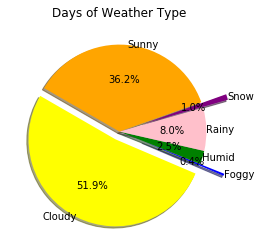

In [8]:
labels2 = []
for x in percent_cond['Weather Condition']:
    labels2.append(x)

type2 = []
for x in percent_cond['Date']:
    type2.append(x)
    
colors = ["yellow" ,"blue" ,"green", "pink", "purple", "orange"]

explode = [.1,.3,0,0,.3,0]
     
plt.pie(type2, labels=labels2, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, 
        pctdistance=.6, labeldistance=1, startangle=150)
plt.title("Days of Weather Type")

plt.savefig("Plots/wtype_crime.png")

In [12]:
crime_df["Weather Condition"]=crime_df["Weather Condition"].replace({"Mostly Cloudy":"Cloudy","Overcast":"Cloudy","Partly Cloudy":"Cloudy",
                                           "Light Rain":"Rainy","Drizzle":"Rainy","Rain":"Rainy","Clear":"Sunny",
                                           "Light Snow":"Snow","Flurries":"Snow","Humid and Mostly Cloudy":"Humid",
                                            "Humid and Overcast":"Humid","Humid and Partly Cloudy":"Humid"})
temp_type = crime_df.groupby('Weather Condition').count()["Age"].reset_index().rename(columns={"Age":"Crimes"})
temp_type

,Weather Condition,Crimes
0,Cloudy,9062
1,Foggy,65
2,Humid,431
3,Rainy,1526
4,Snow,165
5,Sunny,6517


In [13]:
#rate of crime per weather condition (we will test this later)
temp_type2 = temp_type["Crimes"]/percent_cond["Date"]
temp_type2

0    16.627523
1    16.250000
2    16.576923
3    18.166667
4    15.000000
5    17.150000
dtype: float64

In [14]:
temp_type["Rate of Crime per Weather Condition"]= temp_type2
temp_type
#This shows the average crimes per Weather Condition

,Weather Condition,Crimes,Rate of Crime per Weather Condition
0,Cloudy,9062,16.627523
1,Foggy,65,16.250000
2,Humid,431,16.576923
3,Rainy,1526,18.166667
4,Snow,165,15.000000
5,Sunny,6517,17.150000


In [15]:
temp_type["Expected Results"]=17765/1052
temp_type

,Weather Condition,Crimes,Rate of Crime per Weather Condition,Expected Results
0,Cloudy,9062,16.627523,16.886882
1,Foggy,65,16.250000,16.886882
2,Humid,431,16.576923,16.886882
3,Rainy,1526,18.166667,16.886882
4,Snow,165,15.000000,16.886882
5,Sunny,6517,17.150000,16.886882


In [16]:
#weather type testing
stats.chisquare(temp_type["Crimes"],percent_cond["Expected Crimes"])

Power_divergenceResult(statistic=14.439116391437489, pvalue=0.013048019742545878)

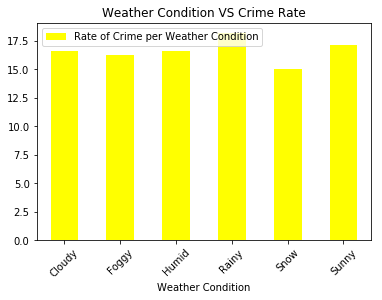

In [33]:
temp_type.plot(kind="bar", x= "Weather Condition", y= "Rate of Crime per Weather Condition",title="Weather Condition VS Crime Rate", 
                                        rot='45', color='yellow')
xlabel=("Weather Condition")
ylabel=("Crimes per Timespan of Data")


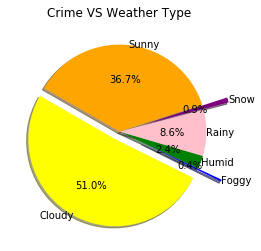

In [13]:
#Breaking down 15 categories into 6 total for plotting Crime VS 
crime_df["Weather Type"]=crime_df["Weather Condition"].replace({"Mostly Cloudy":"Cloudy","Overcast":"Cloudy","Partly Cloudy":"Cloudy",
                                           "Light Rain":"Rainy","Drizzle":"Rainy","Rain":"Rainy","Clear":"Sunny",
                                           "Light Snow":"Snow","Flurries":"Snow","Humid and Mostly Cloudy":"Humid",
                                            "Humid and Overcast":"Humid","Humid and Partly Cloudy":"Humid"})

temp_type = crime_df.groupby('Weather Type').count()["Age"].reset_index().rename(columns={"Age":"Crimes"})


# Weather Condition VS Percent of Crime: 
 
labels = []
for x in temp_type['Weather Type']:
    labels.append(x)

crimes = []
for x in temp_type['Crimes']:
    crimes.append(x)
    
colors = ["yellow" ,"blue" ,"green", "pink", "purple", "orange"]

explode = [.1,.3,0,0,.3,0]
     
plt.pie(crimes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, 
        pctdistance=.6, labeldistance=1, startangle=150)
plt.title("Crime VS Weather Type")

plt.savefig("Plots/wtype_crime.png")

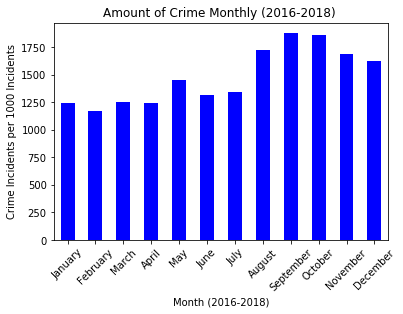

In [14]:
#PETER # Crime Frequency vs Time of Year (seasonality)
# Group data by each month
month_group = crime_df.groupby('Arrest Month')
# Find total amount of crime incidents in each month
monthly_crime = month_group['Arrest Date'].count()
# Organize Months to appear in correct yearly order
organized_monthly_crime = monthly_crime.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


# Graph data & edit chart
organized_monthly_crime_chart = organized_monthly_crime.plot(kind="bar", title="Amount of Crime Monthly (2016-2018) ", 
                                        rot='45', color='blue')
organized_monthly_crime_chart.set_xlabel("Month (2016-2018)")
organized_monthly_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")
# Show graph

plt.savefig("Plots/crime_by_month.png")

plt.show()

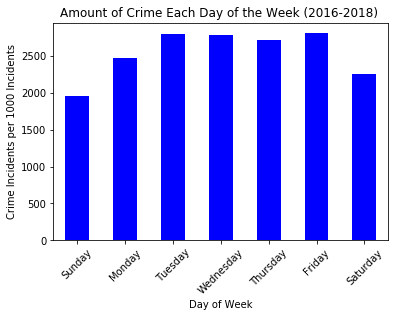

In [15]:
# Group data by each month
day_group = crime_df.groupby('Arrest Day of Week')
# Find total amount of crime incidents in each month
daily_crime = day_group['Arrest Date'].count()
# Organize Days of Week to be in correct order
organized_daily_crime = daily_crime.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                                 'Thursday', 'Friday', 'Saturday'])


# Graph data & edit chart
organized_daily_crime_chart = organized_daily_crime.plot(kind="bar", title="Amount of Crime Each Day of the Week (2016-2018) ", 
                                        rot='45', color='blue')
organized_daily_crime_chart.set_xlabel("Day of Week")
organized_daily_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")

plt.savefig("Plots/crime_by_day_of_week.png")

plt.show()

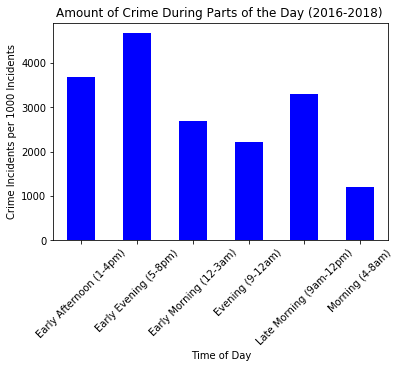

In [16]:
#PETER # Crime Frequency vs Time of Day 

# Group data by each month
day_time_group = crime_df.groupby('Arrest Time of Day')
# Find total amount of crime incidents in each month
day_time_crime = day_time_group['Arrest Date'].count()

# Graph data & edit chart
day_time_crime_chart = day_time_crime.plot(kind="bar", title="Amount of Crime During Parts of the Day (2016-2018) ", 
                                        rot='45', color='blue')
day_time_crime_chart.set_xlabel("Time of Day")
day_time_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")

plt.savefig("Plots/crime_by_time_of_day.png")

plt.show()



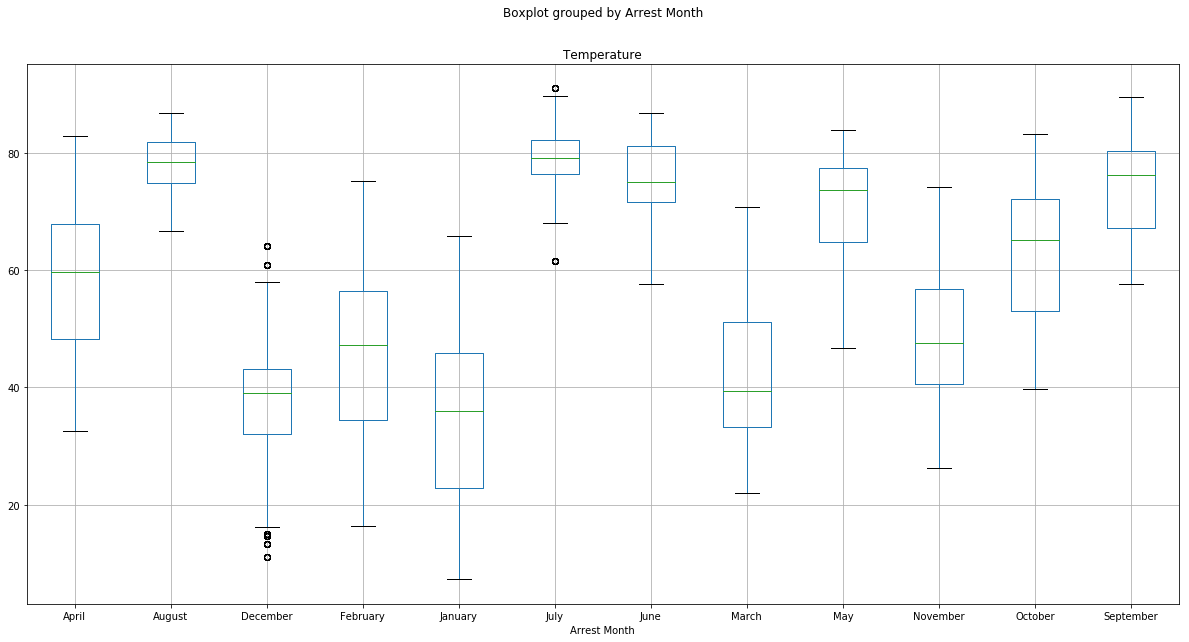

In [17]:
crime_df.boxplot("Temperature", by="Arrest Month", figsize=(20, 10))
plt.savefig("Plots/Temperature_by_Month_boxplot.png")

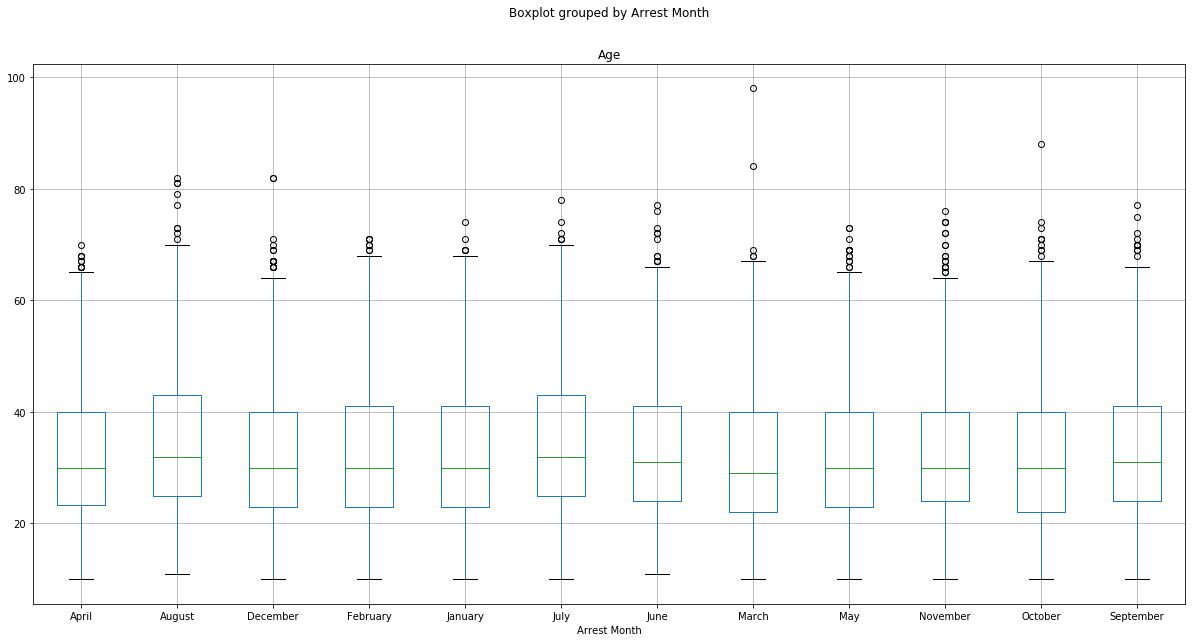

In [18]:
crime_df.boxplot("Age", by="Arrest Month", figsize=(20, 10))
plt.savefig("Plots/Age_by_Month_boxplot.png")

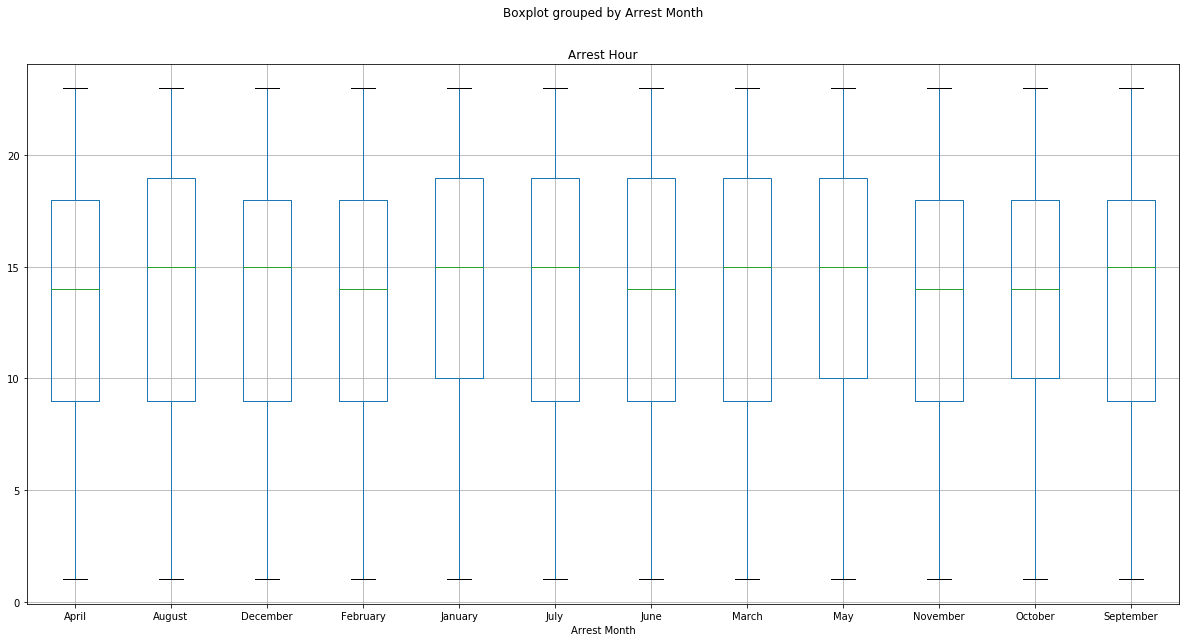

In [19]:
crime_df.boxplot("Arrest Hour", by="Arrest Month", figsize=(20, 10))
plt.savefig("Plots/Arrest_Hour_by_Month_boxplot.png")

### Ema

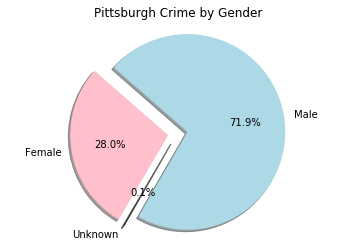

In [12]:
gender_count = crime_df["Gender"].value_counts()
total_gender_count = crime_df["Gender"].count()
gender_percentage = (gender_count/total_gender_count) *100

Gender = ["Male", "Female", "Unknown"]
Percent = [gender_percentage]
colors = ["LightBlue", "Pink", "Black"]
explode = (0.1, 0.1, 0.1)


plt.pie(gender_percentage, explode=explode, labels=Gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime by Gender")

plt.savefig("Plots/crime_by_gender.png")

plt.show()

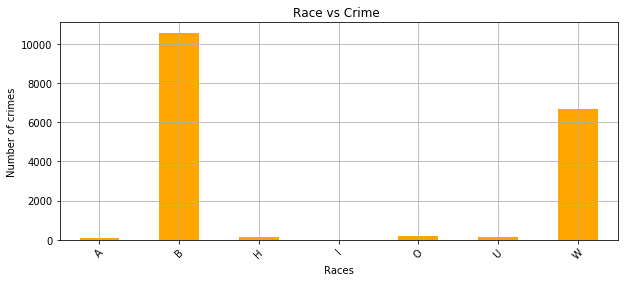

In [13]:
race_group = crime_df.groupby("Race")

race_type_crime = race_group["Offenses Severity"].count()

race_plot = race_type_crime.plot(kind="bar",
                                 title="Race vs Crime ",
                                 rot='45', color='orange',
                                 figsize=(10,4),grid=True)


# race_explanation = {'A':'Asian',
#                     'B':'Black',
#                     'H':'Hispanic/Latino',
#                     'I':'American Indian or Alaskan Native',
#                     'O':'Others', 
#                     'U':'Unknown', 
#                     'W':'White'}

# race_explanation = ['A = Asian',
#                     'B = Black',
#                     'H = Hispanic/Latino',
#                     'I = American Indian or Alaskan Native',
#                     'O = Others', 
#                     'U = Unknown', 
#                     'W = White']


race_plot.set_xlabel("Races")

race_plot.set_ylabel("Number of crimes")

# plt.legend(title = 'Race Types'
#            labels = ['A = Asian','B = Black','H = Hispanic/Latino','I = American Indian or Alaskan Native', 'O = Others', 'U = Unknown', 'W = White'],
#            bbox_to_anchor=(1.05, 1),
#            loc=2,
#            borderaxespad=0.)

#plt.text(42,35, s= ['A = Asian \n B = Black \n H = Hispanic/Latino \n I = American Indian or Alaskan Native \n O = Others \n U = Unknown \n W = White'])



plt.savefig("Plots/crime_by_race.png")

plt.show()

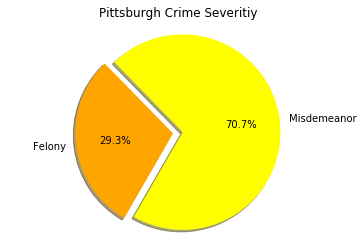

In [14]:
crime_type_count = crime_df["Offenses Severity"].value_counts()
total_crime_count = crime_df["Offenses Severity"].count()
crime_percentage = (crime_type_count/total_crime_count) *100

Offenses = ["Misdemeanor", "Felony"]
Percent = [crime_percentage]
colors = ["Yellow", "Orange"]
explode = (0.1,0)


plt.pie(crime_percentage, explode=explode, labels=Offenses, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime Severitiy")
plt.savefig("Plots/crime_by_severity.png")
plt.show()

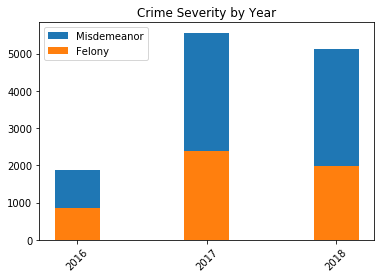

In [15]:
crime_df1 = crime_df.loc[:,["Offenses Severity", "Arrest Year", "Arrest Month"]]

df2=crime_df1.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)

order_list = ["January", "February", "March", "April", 
              "May", "June", "July", "August", "September", 
              "October", "November", "December"] 

df2 = crime_df.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)
df2 = df2[order_list]


df3 = crime_df.groupby(['Offenses Severity', 'Arrest Year'])['Offenses Severity'].count().unstack('Arrest Year').fillna(0)

felonies = df3[:1].values[0]

misdemeanor = df3[1:2].values[0]

number_of_x = np.arange(3)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)

year_plot = plt.xticks(number_of_x, df3.columns, rotation=45)
plt.title("Crime Severity by Year")
plt.legend(labels = ['Misdemeanor','Felony'])
plt.savefig("Plots/crime_severity_by_year.png")


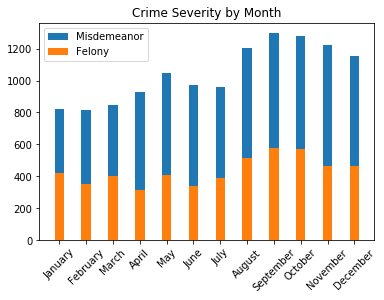

In [16]:
felonies = df2[:1].values[0]

misdemeanor = df2[1:2].values[0]



number_of_x = np.arange(12)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)

month_plot = plt.xticks(number_of_x, df2.columns, rotation=45)
plt.legend(labels = ['Misdemeanor','Felony'])
plt.title("Crime Severity by Month")
plt.savefig("Plots/crime_severity_by_month.png")

# Liam

In [17]:
#Drop irrelevant columns
heatmap_DF = crime_df[['Offenses Severity', 'Arrest Day of Week', 'Arrest Date', 'Arrest Month', 'Arrest Year', 'Temperature', 'Weather Condition', 'Incident Location', 'Incident Latitude', 'Incident Longitude', 'Incident Neighborhood', 'Incident Zone']]
heatmap_DF.head()

,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,M,Friday,12,February,2016,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6
1,M,Wednesday,17,February,2016,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1
2,M,Friday,8,April,2016,39.39,Overcast,"Boyd ST & Diamond ST Pittsburgh, PA 15219",40.438656,-79.993293,Bluff,2
3,M,Sunday,10,April,2016,32.63,Overcast,"Forbes AV & Armstrong TUN Pittsburgh, PA 15219",40.437971,-79.992052,Bluff,2
4,M,Tuesday,12,April,2016,47.32,Clear,"1600 Block Forbes AV Pittsburgh, PA 15219",40.437377,-79.983870,Bluff,2


In [18]:
import geopandas as gpd
import folium

#Pull Pittsburgh City Borders
congr_districts = gpd.read_file("API call and cleaning/Resources/cb_2015_us_cd114_20m")
congr_districts.crs = {'datum': 'NAD83', 'ellps': 'GRS80', 'proj':'longlat', 'no_defs':True}

district14 = congr_districts[ congr_districts.GEOID == '4214' ]  # 42 = PA, 14 = District

#Create folium map config
distric_map = folium.Map(location=[40, -80], zoom_start=9, tiles='cartodbpositron' )
print('default map crs: ',distric_map.crs)

default map crs:  EPSG3857


In [19]:
#Create Folium Map
folium.GeoJson(district14).add_to(distric_map)
distric_map

In [20]:
heatmap_DF["Rounded Lat"] = round(heatmap_DF["Incident Latitude"], 4)
heatmap_DF["Rounded Long"] = round(heatmap_DF["Incident Longitude"], 4)
heatmap_DF2 = heatmap_DF.groupby(["Rounded Lat", "Rounded Long"]).count()
heatmap_DF2 = heatmap_DF2.reset_index()
heatmap_DF2.head()

C:\Users\Liam 2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Liam 2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rounded Lat,Rounded Long,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,0.0000,0.0000,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041
1,39.7538,-78.6783,1,1,1,1,1,1,1,1,1,1,1,1
2,39.9900,-75.7820,1,1,1,1,1,1,1,1,1,1,1,1
3,40.1800,-80.2377,1,1,1,1,1,1,1,1,1,1,1,1
4,40.3126,-80.0830,2,2,2,2,2,2,2,2,2,2,2,2


In [21]:
import folium
from folium.plugins import HeatMap

#Create heatmap, base column doesnt matter
max_amount = float(heatmap_DF2["Temperature"].max())

hmap = folium.Map(location=[40.45, -80], zoom_start=12, )

hm_wide = HeatMap( list(zip(heatmap_DF2["Rounded Lat"].values, heatmap_DF2["Rounded Long"].values, heatmap_DF2.Temperature.values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district14).add_to(hmap)
hmap.add_child(hm_wide)

In [22]:
#Pull Misdemeanors
heatmap_DFM = heatmap_DF.loc[heatmap_DF["Offenses Severity"] == "M"]
heatmap_DFM.head()

,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone,Rounded Lat,Rounded Long
0,M,Friday,12,February,2016,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6,40.4235,-80.0350
1,M,Wednesday,17,February,2016,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1,40.4576,-79.9979
2,M,Friday,8,April,2016,39.39,Overcast,"Boyd ST & Diamond ST Pittsburgh, PA 15219",40.438656,-79.993293,Bluff,2,40.4387,-79.9933
3,M,Sunday,10,April,2016,32.63,Overcast,"Forbes AV & Armstrong TUN Pittsburgh, PA 15219",40.437971,-79.992052,Bluff,2,40.4380,-79.9921
4,M,Tuesday,12,April,2016,47.32,Clear,"1600 Block Forbes AV Pittsburgh, PA 15219",40.437377,-79.983870,Bluff,2,40.4374,-79.9839


In [23]:
#Group
heatmap_DFM = heatmap_DFM.groupby(["Rounded Lat", "Rounded Long"]).count()
heatmap_DFM = heatmap_DFM.reset_index()
heatmap_DFM.head()

,Rounded Lat,Rounded Long,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,0.0000,0.0000,693,693,693,693,693,693,693,693,693,693,693,693
1,40.3126,-80.0830,2,2,2,2,2,2,2,2,2,2,2,2
2,40.3631,-79.9077,1,1,1,1,1,1,1,1,1,1,1,1
3,40.3669,-79.9088,2,2,2,2,2,2,2,2,2,2,2,2
4,40.3670,-79.9152,1,1,1,1,1,1,1,1,1,1,1,1


In [24]:
#For Misdemeanors
max_amount = float(heatmap_DFM["Offenses Severity"].max())

hmap = folium.Map(location=[40.45, -80], zoom_start=12, )

hm_wide = HeatMap( list(zip(heatmap_DFM["Rounded Lat"].values, heatmap_DFM["Rounded Long"].values, heatmap_DFM["Offenses Severity"].values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district14).add_to(hmap)
hmap.add_child(hm_wide)

In [25]:
#Pull Felonies
heatmap_DFF = heatmap_DF.loc[heatmap_DF["Offenses Severity"] == "F"]
heatmap_DFF.head()

,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone,Rounded Lat,Rounded Long
5,F,Tuesday,12,April,2016,47.32,Clear,"400 Block Wood ST Pittsburgh, PA 15219",40.439375,-80.001223,Central Business District,2,40.4394,-80.0012
6,F,Wednesday,13,April,2016,48.68,Clear,"1000 Block Fort Duquesne BL Pittsburgh, PA 15222",40.445511,-79.995245,Central Business District,2,40.4455,-79.9952
7,F,Wednesday,13,April,2016,48.68,Clear,"1000 Block Fort Duquesne BL Pittsburgh, PA 15222",40.445511,-79.995245,Central Business District,2,40.4455,-79.9952
8,F,Wednesday,13,April,2016,48.68,Clear,"1000 Block Fort Duquesne BL Pittsburgh, PA 15222",40.445511,-79.995245,Central Business District,2,40.4455,-79.9952
10,F,Sunday,24,April,2016,61.07,Clear,"800 Block Monteiro ST Pittsburgh, PA 15217",40.426493,-79.935881,Greenfield,4,40.4265,-79.9359


In [26]:
#Group
heatmap_DFF = heatmap_DFF.groupby(["Rounded Lat", "Rounded Long"]).count()
heatmap_DFF = heatmap_DFF.reset_index()
heatmap_DFF.head()

,Rounded Lat,Rounded Long,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,0.0000,0.0000,348,348,348,348,348,348,348,348,348,348,348,348
1,39.7538,-78.6783,1,1,1,1,1,1,1,1,1,1,1,1
2,39.9900,-75.7820,1,1,1,1,1,1,1,1,1,1,1,1
3,40.1800,-80.2377,1,1,1,1,1,1,1,1,1,1,1,1
4,40.3320,-79.9459,1,1,1,1,1,1,1,1,1,1,1,1


In [27]:
#For Felonies
max_amount = float(heatmap_DFF["Offenses Severity"].max())

hmap = folium.Map(location=[40.45, -80], zoom_start=12, )

hm_wide = HeatMap( list(zip(heatmap_DFF["Rounded Lat"].values, heatmap_DFF["Rounded Long"].values, heatmap_DFF["Offenses Severity"].values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district14).add_to(hmap)
hmap.add_child(hm_wide)

In [27]:
testdf = stevie_plot_df.groupby("Temperature Group").count().copy()
testdf = testdf[["Temperature"]]

temp_df = weather_df.copy()
temp_df['Temperature Group'] = pd.cut(temp_df["Temperature"],
                                            bins,
                                            labels=bin_names)
temp_df = temp_df[["Temperature","Temperature Group"]]
temp_df = temp_df.groupby("Temperature Group").count()

tot_days = temp_df["Temperature"].sum()
tot_days

1050

In [29]:
temp_df["Percentage of Days"]= temp_df["Temperature"]/tot_days
temp_df

,Temperature,Percentage of Days
Temperature Group,,
5-25,38,0.036190
25-45,235,0.223810
45-65,276,0.262857
65-85,468,0.445714
>85,33,0.031429


In [34]:
testdf["Expected Count"]=testdf["Temperature"].sum()*temp_df["Percentage of Days"]
testdf

,Temperature,Expected Count
Temperature Group,,
5-25,637,642.96
25-45,4023,3976.20
45-65,4504,4669.92
65-85,8072,7918.56
>85,530,558.36


In [35]:
#chi square expected number of crimes per temperature group
stats.chisquare(testdf["Temperature"],testdf["Expected Count"])

Power_divergenceResult(statistic=10.914838596216061, pvalue=0.027537968616950396)

In [36]:
testdf["Temperature"].sum()

17766